In [1]:
import pandas as pd

df = pd.read_csv('connections_clean.csv')
df.tail()

,date,category,w1,w2,w3,w4
471,2023-06-13,LETTER HOMOPHONES,ARE,QUEUE,SEA,WHY
472,2023-06-12,WET WEATHER,HAIL,RAIN,SLEET,SNOW
473,2023-06-12,NBA TEAMS,BUCKS,HEAT,JAZZ,NETS
474,2023-06-12,KEYBOARD KEYS,OPTION,RETURN,SHIFT,TAB
475,2023-06-12,PALINDROMES,KAYAK,LEVEL,MOM,RACE CAR


In [2]:
from functools import cache
from keybert import KeyBERT
import numpy as np

kw_model = KeyBERT(model='all-MiniLM-L6-v2')

@cache
def create_embeddings(texts):
    try : 
        return np.array(kw_model.extract_embeddings(texts)[0][0])
    except:
        return np.zeros(384)

create_embeddings('hello')[:10]

array([-0.06277172,  0.05495872,  0.05216478,  0.08578996, -0.08274896,
       -0.07457294,  0.06855468,  0.01839648, -0.08201128, -0.03738483],
      dtype=float32)

In [3]:
label = []
word = []

for idx, row in df.iterrows():
    for i in range(1, 5):
        word.append(row[f'w{i}'])
    label.extend([idx] * 4)

finished_df = pd.DataFrame({'label': label, 'word': word})
finished_df['embedding'] = finished_df['word'].apply(create_embeddings)
finished_df.head()

,label,word,embedding
0,0,ANNIVERSARY,"[-0.06276984, 0.10821476, 0.047664665, -0.0253..."
1,0,BIRTHDAY,"[-0.084567346, 0.11157629, -0.006238818, 0.041..."
2,0,SHOWER,"[-0.004404458, 0.015580897, 0.112289116, 0.019..."
3,0,WEDDING,"[-0.016065089, 0.090614215, 0.003278323, 0.038..."
4,1,BARS,"[-0.010722448, 0.019358307, -0.021829613, 0.01..."


Text(0.5, 1.0, 'Embedded via UMAP using Labels')

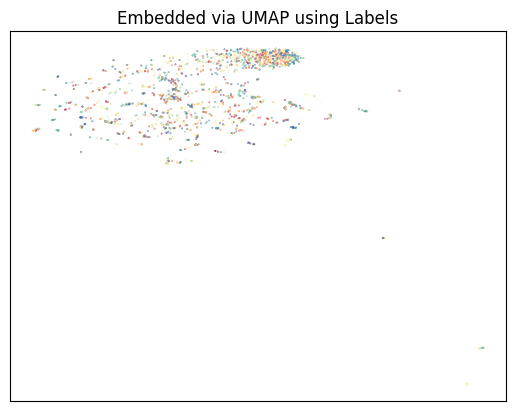

In [4]:
import umap
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')
embeddings = np.array(finished_df['embedding'].to_list())
embeddings_scaled = StandardScaler().fit_transform(embeddings)
labels = np.array(finished_df['label'])

embedding = reducer.fit_transform(embeddings_scaled, y=labels)


fig, ax = plt.subplots()

plt.scatter(*embedding.T, s=0.1, c=labels, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
plt.title('Embedded via UMAP using Labels')

In [9]:
reducer.transform([finished_df['embedding'][0]])[0]

array([-19.466295,  46.546803], dtype=float32)

In [10]:
from tqdm import tqdm
tqdm.pandas()


finished_df['umap'] = finished_df['embedding'].progress_apply(lambda x: reducer.transform([x])[0])


100%|██████████| 1904/1904 [22:58<00:00,  1.38it/s]


In [16]:
finished_df.to_csv('umap.csv', index=False)